(DGTGRAFO)=

# 4.1 Definiciones generales de flujo en redes

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de 

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Tendrá una lista de definiciones de flujo en redes que servirán de referencia para las notas del capítulo.


```

```{sidebar} Un poco de historia ...

El área de [investigación de operaciones](https://en.wikipedia.org/wiki/Operations_research) tuvo un gran desarrollo entre los años 40's y 50's principalmente para resolver la asignación de recursos disponibles en actividades militares (de hecho el nombre hace referencia a operaciones militares). Métodos como el [símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) de Dantzig fueron desarrollados en esta época y establecieron triunfos importantes del lado de Estados Unidos y Gran Bretaña en batallas militares. Posterior a la segunda guerra mundial la complejidad de la división del trabajo y organización en empresas plantearon problemas en esencia iguales que los que se debían resolver en las guerras.
Esta área resuelve problemáticas como son las relacionadas con la conducción y coordinación de actividades en una organización. Ha sido aplicada de manera extensa en manufactura, transporte, construcción, telecomunicaciones, planeación financiera, cuidado de la salud, fuerzas armadas y servicios públicos, entre otros.
```

Muchas aplicaciones en el área de investigación de operaciones ayudan a modelar y resolver situaciones en forma de una **red** de nodos conectados como las siguientes:

1. Diseño de una tubería en una zona para conectar las locaciones de suministro de cierto producto con puntos de descarga del mismo con el objetivo de minimizar el costo de construír tal tubería. 
   Diseño de un cableado de telefonía subterránea para establecer la comunicación entre cualquier par de domicilios de personas con el objetivo de minimizar la cantidad de kilómetros que se usarán de cable.

2. Determinar la ruta más corta entre dos ciudades en una red de transporte que involucra más de dos ciudades.

3. Determinar la capacidad máxima de cierta sustancia que puede soportar una tubería que conecta dos o más plantas de suministro. 
   Determinar la asignación de personas en tranvías para llegar a destinos mediante varias rutas en un parque de diversiones de modo que se maximice el número total de viajes que se pueden hacer al día por diferentes rutas, las cuales tienen cierto límite de viajes en cada ruta.

4. Determinar la agenda y planeación de actividades incluyendo fechas de inicio y término de un proyecto.

5. Determinar la distribución de flujo con costo mínimo de campos de petróleo hacia refinerías a través de una red de tuberías.

```{admonition} Observación
:class: tip

Aunque el nombre de red y el de grafo se distinguen en que en la red se definen capacidades y costos mientras que en el grafo no, en este capítulo se utilizan ambos nombres como sinónimos.

```

## Problemas/Modelos de flujo en redes, *aka network flow problems/models*, estándar

Un buen número de problemas de optimización de redes son en realidad tipos especiales de problemas de **programación lineal**, por ejemplo el {ref}`problema de transporte <EJPROBTRANSPORTE>` en el que se resuelve cómo determinar la manera óptima de transportar bienes. Otro problema es el definido en un **problema de asignación** que incluye aplicaciones como la asignación de personas a tareas. Aunque los métodos clásicos del símplex o puntos interiores (ver {ref}`introducción a los métodos de puntos interiores <INTMETPIN>`) podrían utilizarse para resolver tales problemas, existen métodos especializados (como [network simplex](https://en.wikipedia.org/wiki/Network_simplex_algorithm) o dual simplex) aplicados a redes que modelan tales problemas y tienen un mejor desempeño que los clásicos.

Es típico encontrar en la literatura el estudio de tres preguntas básicas relacionadas con problemas específicos:

1. **Problema del camino o ruta más corta**. ¿Cuál es la mejor manera para recorrer una red y llegar de un punto a otro de modo que sea lo más barato posible?

2. **Problema de flujo máximo**. Si una red tiene capacidades en sus arcos ¿cómo podemos enviar la mayor cantidad de flujo posible entre dos puntos en la red manteniendo los límites de capacidades en sus arcos?

3. **Problema del flujo con costo mínimo**. Si se incurre en un costo por unidad de flujo en una red con capacidades en sus arcos y necesitamos enviar unidades de un bien que residen en uno o más puntos en la red hacia uno o más puntos distintos en la misma ¿cómo podemos enviar tal material al mínimo costo posible?

A los problemas anteriores los nombraremos como **problemas/modelos de flujo en redes o *network flow problems/models* estándar**.

```{admonition} Comentarios

* La solución de los problemas estándar puede realizarse enumerando las posibles alternativas para cada problema (piénsese por ejemplo en encontrar la ruta más corta entre dos ciudades en una red de transporte), esto si bien resuelve las preguntas planteadas, no es práctico por la cantidad enorme de alternativas que resultarían. Por esto se requieren algoritmos cuyo tiempo de cómputo sea pequeño o al menos razonable. 

* Los problemas estándar han sido estudiados y descritos ampliamente en la literatura de investigación de operaciones principalmente por ser modelos abstractos que han permitido el desarrollo de algoritmos para resolver problemas en aplicaciones que surgen en la práctica más complejos y que comparten similitudes con los estándar.

```

## Definiciones generales para flujo en redes

La representación con redes las encontramos en muchas áreas como producción, distribución, planeación de proyectos, localización de instalaciones, administración de recursos y planeación financiera. Además, provee una visualización conceptual poderosa para mostrar las relaciones entre las componentes de sistemas científicos, sociales y económicos por mencionar algunos.

A continuación se presentan definiciones utilizadas en la literatura sobre flujo en redes.

## Redes dirigidas

```{admonition} Definición

Una red dirigida, *aka digraph*, $\mathcal{G} = (\mathcal{N}, \mathcal{A})$ consiste de un conjunto $\mathcal{N}$ de nodos (vértices, puntos) y un conjunto $\mathcal{A}$ de arcos (aristas, ramas, líneas), *aka edges*, cuyos elementos son pares ordenados para nodos distintos.

```

### Ejemplo

La siguiente red dirigida tiene como nodos $\mathcal{N} = \{0, 1, 2, 3, 4, 5, 6\}$ y arcos $\mathcal{A} = \{(0,1), (0,2), (1,2), (1,3), (2,5), (3,4), (3,6), (4,1), (4,2), (4,6), (5,6) \}$.

In [1]:
!pip install --user --quiet networkx

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

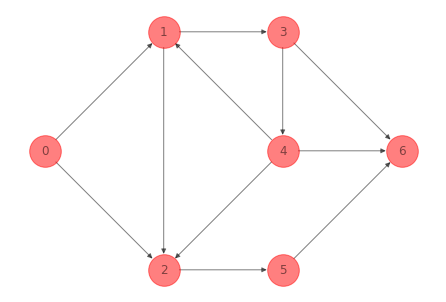

In [2]:
nodes_pos_ex_1 = [[0.09090909090909091, 0.4545454545454546],
                  [0.36363636363636365, 0.7272727272727273],
                  [0.36363636363636365, 0.18181818181818182],
                  [0.6363636363636364,  0.7272727272727273],
                  [0.6363636363636364,  0.4545454545454546],
                  [0.6363636363636364,  0.18181818181818182],
                  [0.9090909090909092,  0.4545454545454546]]
nodes = range(len(nodes_pos_ex_1))
G_ex_1 = nx.DiGraph() 
G_ex_1.add_nodes_from(nodes)
G_ex_1.add_edge(0,1)
G_ex_1.add_edge(0,2)
G_ex_1.add_edge(1,2)
G_ex_1.add_edge(1,3)
G_ex_1.add_edge(2,5)
G_ex_1.add_edge(3,4)
G_ex_1.add_edge(3,6)
G_ex_1.add_edge(4,1)
G_ex_1.add_edge(4,2)
G_ex_1.add_edge(4,6)
G_ex_1.add_edge(5,6)
nx.draw(G_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Comentarios

Los siguientes nombres son utilizados para referirse a algunas componentes de un arco:

* El arco $(i,j)$ tiene dos *endpoints*: $i$ y $j$.

* El arco $(i,j)$ tiene *tail* $i$ y *head* $j$.

* El arco $(i,j)$ es incidente a los nodos $i,j$, sale (emana) del nodo $i$ y termina (entra) en el nodo $j$. 

```

## Grado de un nodo

```{admonition} Definición

El *indegree* de un nodo es el número arcos que entran al nodo y su *outdegree* es el número de arcos que salen del mismo. El grado de un nodo es la suma de su *indegree* y *outdegree*.

```

Para el grafo anterior se tiene:

In [3]:
print(nx.degree(G_ex_1))

[(0, 2), (1, 4), (2, 4), (3, 3), (4, 4), (5, 2), (6, 3)]


Entonces el nodo $0$ tiene un grado de $2$ y el nodo $6$ de $3$.

## Redes no dirigidas

```{admonition} Definición

Se define una red no dirigida al igual que el caso dirigido considerando que los arcos son pares no ordenados de nodos distintos. En una red no dirigida podemos referirnos al arco que une al par de nodos $i$ y $j$ como $(i,j)$ o $(j,i)$ indistintamente. 

```

```{admonition} Observación
:class: tip

La interpretación de un arco $(i,j)$ no dirigido se interpreta indicando que el flujo se permite en ambas direcciones, de $i$ a $j$ o $j$ a $i$. En el dirigido, el flujo sólo se permite en una dirección.

```

### Ejemplo

La siguiente red no dirigida tiene como nodos $\mathcal{N} = \{0, 1, 2, 3, 4, 5\}$ y arcos $\mathcal{A} = \{(1,0), (0,2), (1,3), (4,1), (2, 3), (2, 4), (3, 5), (4, 5) \}$:

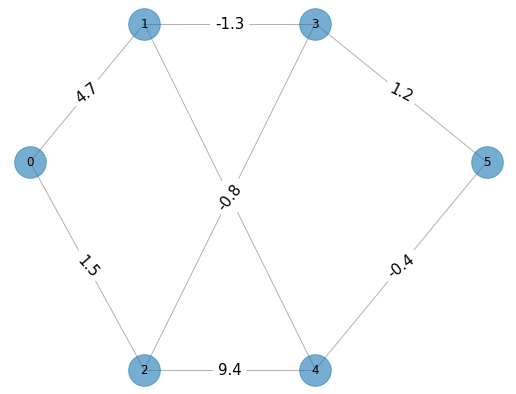

In [4]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.5454545454545454],
                  [0.2727272727272727, 0.7272727272727273],
                  [0.2727272727272727, 0.2727272727272727],
                  [0.5454545454545454, 0.7272727272727273],
                  [0.5454545454545454, 0.2727272727272727],
                  [0.8181818181818182, 0.5454545454545454]]
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.Graph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 4.7,
               (0,2): 1.5,
               (1,3): -1.3,
               (1,4): 3.2,
               (2,3): -0.8,
               (2,4): 9.4,
               (3,5): 1.2,
               (4,5): -0.4
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos = nodes_pos_ex_2, alpha = 0.3, min_source_margin=8, min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos = nodes_pos_ex_2, edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos = nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos = nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

La red anterior tiene arcos con **valores numéricos** asociados que ayudan a representar típicamente costos, capacidades y/o suministro o demanda. 

```{admonition} Definición

En la terminología de flujo en redes, la capacidad de un arco es la cantidad máxima de flujo que puede circular en el mismo.

```

```{admonition} Comentarios

* Los arcos en una red no dirigida en ocasiones se les nombra ligaduras.

* Una red no dirigida puede convertirse en una dirigida sustituyendo sus ligaduras por dos arcos en direcciones opuestas entre el par de nodos involucrados. La interpretación en este caso puede ser un "flujo neto" entre ambos nodos. Por tanto, las definiciones también son aplicables a redes no dirigidas y las definiciones que se dan en esta nota **asumen** que se tiene una red dirigida. Ver por ejemplo [to_directed](https://networkx.org/documentation/stable//reference/classes/generated/networkx.DiGraph.to_directed.html).

```

## Adyacencia

```{admonition} Definición

Si existe un arco $(i,j) \in  \mathcal{A}$ entonces el nodo $j$ es adyacente al nodo $i$.

```

## Representación de redes: matriz de adyacencia

Nos ayuda a representar las adyacencias entre nodos. Almacena la red como una matriz $\mathcal{M}_{A}$ de tamaño $n \times n$ con $n$ el número de nodos, tiene un renglón y columna por cada nodo. Su entrada $i,j$ es igual a $1$ si $(i,j) \in \mathcal{A}$ y $0$ en otro caso.

```{amonition} Comentario

Si tenemos $m$ arcos entonces $m$ elementos de $\mathcal{M}_{A}$ son distintos de cero. Si los arcos tienen costos o capacidades éstos se pueden almacenar en matrices del mismo tamaño siguiendo la misma representación anterior en la que se sustituye el $1$ por el costo o capacidad.

```

### Ejemplo

Para la red del ejemplo 1 anterior se tiene la función `adjacency_matrix` para una representación *sparse*:

```{margin}

El resultado de la función `adjacency_matrix` es equivalente al de `to_scipy_sparse_matrix`

```

In [5]:
print(nx.to_scipy_sparse_matrix(G_ex_1))

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 3)	1
  (2, 5)	1
  (3, 4)	1
  (3, 6)	1
  (4, 1)	1
  (4, 2)	1
  (4, 6)	1
  (5, 6)	1


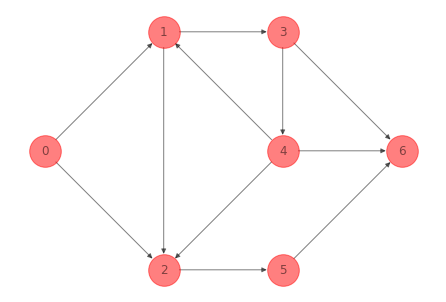

In [6]:
nx.draw(G_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

In [7]:
print(nx.adjacency_matrix(G_ex_1))

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (1, 3)	1
  (2, 5)	1
  (3, 4)	1
  (3, 6)	1
  (4, 1)	1
  (4, 2)	1
  (4, 6)	1
  (5, 6)	1


Y se puede usar `to_numpy_array` para obtener una matriz de tamaño $7 \times 7$:

In [8]:
print(nx.to_numpy_array(G_ex_1))

[[0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


Podemos leer la matriz de adyacencia por renglón o columna. En el renglón $i$ si nos encontramos con una entrada distinta de cero nos indica que en la red existe un arco dirigido que **sale** de $i$, esto es $(i,j) \in \mathcal{A}$. En la columna $j$ si nos encontramos con una entrada distinta de cero nos indica que en la red existe un arco dirigido que **entra** al nodo $j$, esto es $(i,j) \in \mathcal{A}$.

# Revisar si tiene sentido colocar una red no dirigida con flujo

### Ejemplo

Para la red del ejemplo 2 anterior:

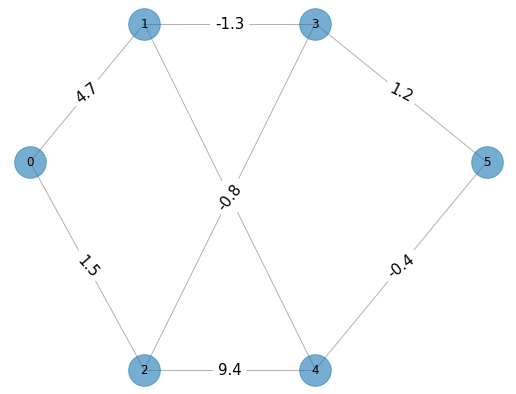

In [9]:
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos = nodes_pos_ex_2, alpha = 0.3, min_source_margin=8, min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos = nodes_pos_ex_2, edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos = nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos = nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

```{margin}

Obsérvese que se utiliza la función `todense` pues se almacena el *NumPy* *array* en formato *sparse*.

```

In [10]:
print(nx.adjacency_matrix(G_ex_2).todense())

[[ 0.   4.7  1.5  0.   0.   0. ]
 [ 4.7  0.   0.  -1.3  3.2  0. ]
 [ 1.5  0.   0.  -0.8  9.4  0. ]
 [ 0.  -1.3 -0.8  0.   0.   1.2]
 [ 0.   3.2  9.4  0.   0.  -0.4]
 [ 0.   0.   0.   1.2 -0.4  0. ]]


```{admonition} Observación
:class: tip

Obsérvese que para una red no dirigida su matriz de adyacencia es simétrica.

```

### Ejemplo: otras representaciones en *Python*

Ver [converting-to-and-from-other-data-formats](https://networkx.org/documentation/stable//reference/convert.html#converting-to-and-from-other-data-formats) para otros formatos. Por ejemplo un *DataFrame* de *Pandas*:


In [11]:
print(nx.to_pandas_adjacency(G_ex_2))

     0    1    2    3    4    5
0  0.0  4.7  1.5  0.0  0.0  0.0
1  4.7  0.0  0.0 -1.3  3.2  0.0
2  1.5  0.0  0.0 -0.8  9.4  0.0
3  0.0 -1.3 -0.8  0.0  0.0  1.2
4  0.0  3.2  9.4  0.0  0.0 -0.4
5  0.0  0.0  0.0  1.2 -0.4  0.0



Una representación de la matriz de adyacencia usando diccionarios en *Python* es con la función `to_dict_of_dicts`:



In [12]:
import pprint

In [13]:
pprint.pprint(nx.to_dict_of_dicts(G_ex_2))

{0: {1: {'weight': 4.7}, 2: {'weight': 1.5}},
 1: {0: {'weight': 4.7}, 3: {'weight': -1.3}, 4: {'weight': 3.2}},
 2: {0: {'weight': 1.5}, 3: {'weight': -0.8}, 4: {'weight': 9.4}},
 3: {1: {'weight': -1.3}, 2: {'weight': -0.8}, 5: {'weight': 1.2}},
 4: {1: {'weight': 3.2}, 2: {'weight': 9.4}, 5: {'weight': -0.4}},
 5: {3: {'weight': 1.2}, 4: {'weight': -0.4}}}


## Representación de redes: matriz de incidencia nodo-arco

Nos ayuda a representar los arcos de una red como una matriz $\mathcal{M}_{I}$ de tamaño $n \times m$ con $n$ el número de nodos y $m$ el número de arcos que contiene un renglón por cada nodo de la red y una columna por cada arco. La columna correspondiente al arco $(i,j)$ tiene el número $1$ en el renglón correspondiente al nodo $i$ y un $-1$ en el renglón correspondiente al nodo $j$.

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz $\mathcal{M}_I$. 
```

```{margin}

Obsérvese que se utiliza la función `todense` pues se almacena el *NumPy* *array* en formato *sparse*.

```

In [14]:
print(-1*nx.incidence_matrix(G_ex_1, oriented=True).todense())

[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0. -1. -1.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1. -1.]]


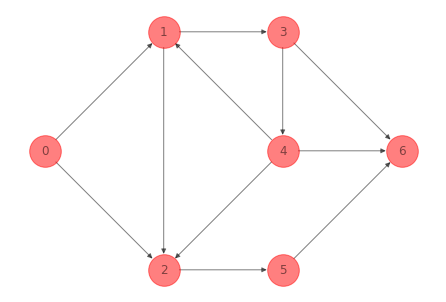

In [15]:
nx.draw(G_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Comentarios


* Si consideramos a los renglones de la matriz de incidencia como vectores y hacemos la suma de los mismos entonces el resultado es cero, esto es equivalente a escribir que la matriz de incidencia no tiene *rank* igual a $n$. Puede verificarse que tiene *rank* igual a $n-1$.

* Sólo $2m$ de las $nm$ entradas son distintas de cero. Aún más, el número de $1$'s en un renglón equivale al *outdegree* del correspondiente nodo y el número de $-1$'s por renglón corresponde al *indegree* del nodo.



```

In [16]:
import numpy as np

In [17]:
np.linalg.matrix_rank(nx.incidence_matrix(G_ex_1, oriented=True).todense())

6

## *Subgraph*, *induced subgraph*, *spanning subgraph*

```{admonition} Definición

Una red $\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es una *subgraph* de $\mathcal{G}$ si $\mathcal{N}' \subseteq \mathcal{N}$ y $\mathcal{A}' \subseteq \mathcal{A}$.

```

### Ejemplo

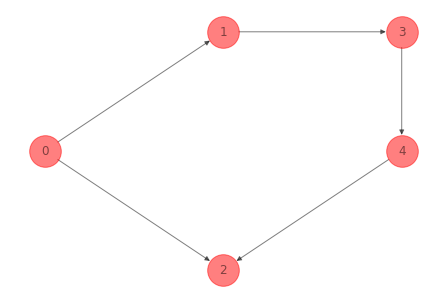

In [19]:
G_subgraph_ex_1 = nx.classes.function.subgraph(G_ex_1, [0, 1, 2, 3, 4]).copy()
G_subgraph_ex_1.remove_edges_from([(1,2), (4,1)])
nx.draw(G_subgraph_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Definición

$\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es la *subgraph* de $\mathcal{G}$ inducida por $\mathcal{N}'$ si $\mathcal{A}'$ contiene todos los arcos en $\mathcal{A}$ (ambos *endpoints* deben estar en $\mathcal{N}'$).

```

### Ejemplo

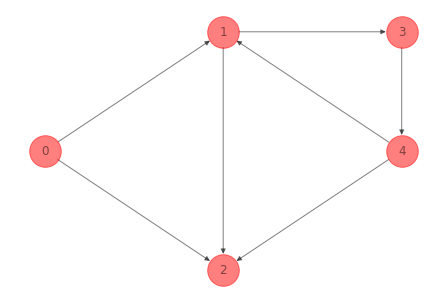

In [20]:
G_induced_subgraph_ex_1 = nx.classes.function.subgraph(G_ex_1, [0, 1, 2, 3, 4]).copy()
nx.draw(G_induced_subgraph_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

```{admonition} Definición

Una red $\mathcal{G}' = (\mathcal{N}', \mathcal{A}')$ es una *spanning subgraph* de $\mathcal{G}$ si $\mathcal{N}' = \mathcal{N}$ y $\mathcal{A}' \subseteq \mathcal{A}$. Esto es, *spans* todos los nodos de $\mathcal{G}$.

```

### Ejemplo

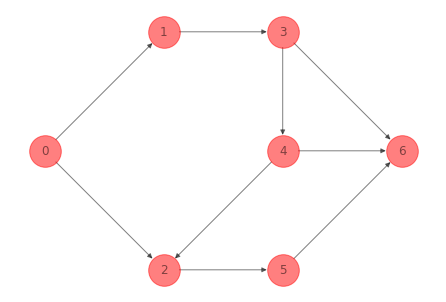

In [21]:
G_spanning_subgraph = G_ex_1.copy()
G_spanning_subgraph.remove_edges_from([(1,2), (4,1)])
nx.draw(G_spanning_subgraph, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

## *Tree*

# Revisar defs *minimum spanning tree*, arborescence en libro de Bazaraa, libro de Ahuja y en networkx.

Ver [networkx.algorithms.tree](https://networkx.org/documentation/stable//reference/algorithms/tree.html)

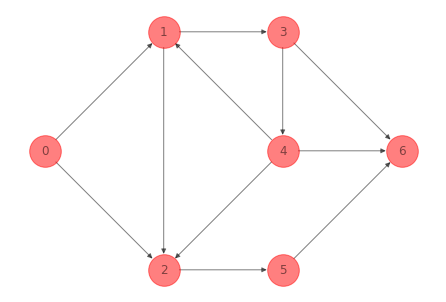

In [15]:
nx.draw(G_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

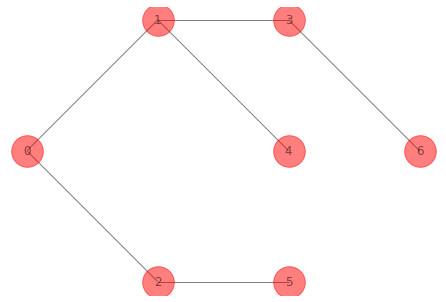

In [36]:
G_tree_ex_1 = nx.algorithms.minimum_spanning_tree(G_ex_1.to_undirected())
nx.draw(G_tree_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

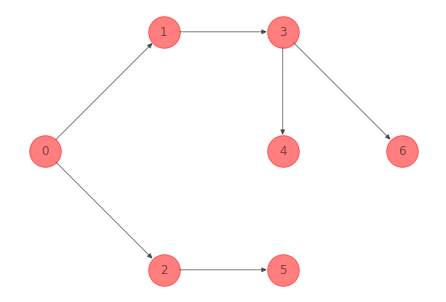

In [37]:
G_arborescence_ex_1 = nx.algorithms.minimum_spanning_arborescence(G_ex_1)
nx.draw(G_arborescence_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

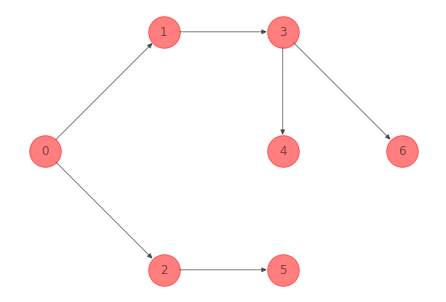

In [38]:
G_max_arborescence_ex_1 = nx.algorithms.maximum_spanning_arborescence(G_ex_1)
nx.draw(G_max_arborescence_ex_1, pos = nodes_pos_ex_1,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

## *Walk*

## *Path*

## Algunas aplicaciones de flujo en redes

**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



